<a href="https://colab.research.google.com/github/NLZT/Deep-Dive-Projects/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1: Naive Bayes Classification to Predict Customer Behavior

In [ ]:
#mount drive to import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Problem Definition
In this project we will take anonymized transactional data to see if there is any relationship between those behaviors and the target outcome. Which in this case is make an additional transaction. 



##Data Collection

*   Load Python Packages
*   Load the data contained in Train.csv into a DataFrame
*   Create a back-up copy of the original data at the start of the runtime




In [ ]:
#import python packages
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [ ]:
#import csv data set from google file path
train_path = '/content/drive/MyDrive/Copy of Train.csv'
train = pd.read_csv(train_path)
train_backup=train.copy()

##Data Cleaning

*   Examine the data
*   Clean the data if any issues are there



Initial look at the first few rows to make sure everything looks okay.

In [ ]:
train

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760


In [ ]:
train.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


Next we'll look at the last few rows of the data just to double check that everything looks good.

In [ ]:
train.tail()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760
179999,179999,train_179999,0,11.6252,3.3959,11.5558,4.2003,7.4666,13.7381,12.9590,...,5.0415,-2.4210,-3.6829,14.2422,1.0741,26.3943,4.1482,11.9539,2.9846,15.6002


###Drop Columns
Frist we will drop the columns that don't look useful.
Unnamed and ID_code are iterations of the index, and will not be helpful in making conclusions.

In [ ]:
train.drop('Unnamed: 0', axis=1, inplace=True)
train.drop('ID_code', axis=1, inplace=True)

We should double check the DataFrame since I modified it inplace.

In [ ]:
train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


Looks good! 
Lets continue to examine the DataFrame.

In [ ]:
#size of the dataframe
train.shape

(180000, 51)

In [ ]:
#types and counts of each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   target  180000 non-null  int64  
 1   var_0   180000 non-null  float64
 2   var_1   180000 non-null  float64
 3   var_2   180000 non-null  float64
 4   var_3   180000 non-null  float64
 5   var_4   180000 non-null  float64
 6   var_5   180000 non-null  float64
 7   var_6   180000 non-null  float64
 8   var_7   180000 non-null  float64
 9   var_8   180000 non-null  float64
 10  var_9   180000 non-null  float64
 11  var_10  180000 non-null  float64
 12  var_11  180000 non-null  float64
 13  var_12  180000 non-null  float64
 14  var_13  180000 non-null  float64
 15  var_14  180000 non-null  float64
 16  var_15  180000 non-null  float64
 17  var_16  180000 non-null  float64
 18  var_17  180000 non-null  float64
 19  var_18  180000 non-null  float64
 20  var_19  180000 non-null  float64
 21  var_20  18

There doesn't appear to be any null values!
But can still double check that and get a better idea of what our target looks like.

In [ ]:
train.isna().sum().sum()

0

In [ ]:
train['target'].value_counts()

0    161960
1     18040
Name: target, dtype: int64

Still looking good. 
There are a lot of more 0's than 1's in the target, but that's okay because there are still plently of each. There are no unexpected values!

##Exploratory Data Analysis

* Initial statistical analysis  
* Produce visuals to represent varibles
* Examine correlations





In [ ]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.00000,180000.000000,180000.000000,...,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,0.100222,10.678650,-1.630045,10.712922,5.408688,7.566953,14.024017,8.52808,15.243424,17.264876,...,5.635897,-0.000418,-0.668334,20.208845,2.595090,12.756574,3.236201,7.440715,1.927078,15.870166
std,0.300297,3.041036,4.050519,2.639146,0.866265,1.235043,0.190038,4.64170,7.851050,8.203204,...,0.369629,4.422915,5.968300,7.132446,2.801692,9.320939,4.561317,3.021636,1.476777,3.010492
min,0.000000,0.408400,-15.043400,2.117100,2.347300,3.970500,13.434600,-6.01110,-10.664200,-10.089000,...,4.258800,-14.506000,-22.748700,-2.995300,-7.856100,-18.489700,-14.093300,-2.691700,-3.814500,6.299300
25%,0.000000,8.451675,-4.745600,8.720000,4.768500,6.618800,13.893900,5.06575,9.170200,11.552000,...,5.374200,-3.253575,-4.997500,15.062900,0.628600,5.661300,-0.062000,5.160325,0.890000,13.830400
50%,0.000000,10.526750,-1.611250,10.579600,5.385600,7.628500,14.025500,8.59920,15.198900,17.246850,...,5.634500,0.008500,-0.560300,20.203300,2.513800,12.520300,3.204650,7.350950,1.899700,15.934600
75%,0.000000,12.756200,1.360225,12.514100,6.003200,8.583800,14.164400,12.27330,21.010500,23.100050,...,5.905600,3.098325,3.632525,25.639125,4.396725,19.461725,6.409900,9.511125,2.947225,18.061425
max,1.000000,20.315000,10.376800,19.353000,8.447700,11.150600,14.654500,22.33150,41.748000,49.044300,...,7.089000,16.731900,18.855400,43.546800,13.448700,44.363400,18.440900,16.716500,8.402400,26.079100


There isn't much to go off of here, especially since most of the columns are covered by the ellipsis. Lets take a look at the standard deviation.

One thing to note is how low the target average is. That means that there are very few hits compared to misses.

There are a few that stick out quite a bit. Especially var_35. This could be nothing, but definatly something to keep an eye on. I'll make a DataFrame of it to referance later.

## Exploring the STD

Varibles with high STD

In [ ]:
descript=train.describe()
descript.loc['std']

target     0.300297
var_0      3.041036
var_1      4.050519
var_2      2.639146
var_3      0.866265
var_4      1.235043
var_5      0.190038
var_6      4.641700
var_7      7.851050
var_8      8.203204
var_9      2.845792
var_10     5.921909
var_11     4.324646
var_12     0.541385
var_13     8.278554
var_14     5.905752
var_15     0.764765
var_16     7.364523
var_17     7.939415
var_18     1.993530
var_19     7.432116
var_20     2.300002
var_21     7.748588
var_22     4.185923
var_23     2.765963
var_24     1.862151
var_25     0.171058
var_26     4.354830
var_27     3.823662
var_28     2.621057
var_29     5.169343
var_30     0.375564
var_31     7.686960
var_32     2.520602
var_33     7.418545
var_34     0.198989
var_35    10.384752
var_36     4.964332
var_37     5.455353
var_38     5.019303
var_39     0.369891
var_40     0.369629
var_41     4.422915
var_42     5.968300
var_43     7.132446
var_44     2.801692
var_45     9.320939
var_46     4.561317
var_47     3.021636
var_48     1.476777


In [ ]:
std_mask=descript.loc['std']<1
high_variance_var=descript.loc['std'][std_mask]
high_variance_var

target    0.300297
var_3     0.866265
var_5     0.190038
var_12    0.541385
var_15    0.764765
var_25    0.171058
var_30    0.375564
var_34    0.198989
var_39    0.369891
var_40    0.369629
Name: std, dtype: float64

Varibles that have a high std



##Data Visualization

In [ ]:
for i in range(51):
  plt.hist(train[train.columns[i]])
  plt.title(train.columns[i])
  plt.show()

In [ ]:
for i in range(51):
  plt.hist(train[train.columns[i]], alpha=.2)
  
plt.show()

In [ ]:
#very long run at your own risk
for j in range(51):
  for i in range(51):
    plt.scatter(hit[hit.columns[j]],hit[hit.columns[i]], color = 'black', alpha=.05)
    plt.title(f'{hit.columns[j]} vs {hit.columns[i]}')
    plt.show()

These histograms are all normal which means we can do a Naivie Bayes Analysis.
Also while the scatters don't show any strong correlations there were some intersting things to come out of it.

## Data Processing


## Gaussian Naive Bayes Model

Create a GNB model

In [ ]:
gnb=GaussianNB()

Seperate features and targets

In [ ]:
y=train['target'].copy()
X=train.drop('target', axis=1, inplace=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 36000 points : 3283


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


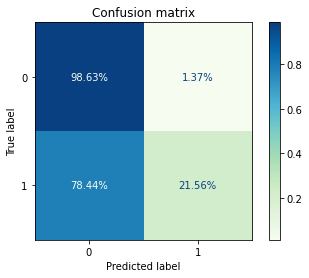

In [ ]:
metrics.plot_confusion_matrix(gnb, X_test, y_test, normalize = 'true', values_format = '.2%', cmap='GnBu')
plt.title('Confusion matrix');

This looks bad. There are way too many false positives in this model. 

##Mask
This might be due to the large offset between hits and no hits in the target so lets look at hits seperately.

In [ ]:
hit_mask=train['target']==1
hit=train[hit_mask]
hit

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
13,1,16.3699,1.5934,16.7395,4.8222,8.6978,13.7999,2.7925,14.3984,19.4258,...,5.6656,3.5750,-2.2723,15.7383,8.5618,11.8982,7.4002,7.4031,4.3989,15.6064
29,1,5.3301,-2.6064,13.1913,5.9064,9.1168,14.0957,12.3335,1.6610,13.0446,...,5.4183,8.6643,4.1428,4.7056,4.3694,16.4554,5.9215,7.9676,2.3405,17.4105
63,1,7.7072,0.0183,9.9974,6.0425,6.6710,14.0503,9.0144,-2.3445,23.5101,...,6.0669,2.5841,2.2445,23.1283,2.9384,27.6213,1.5832,5.0039,3.8814,15.7685
65,1,10.5358,-2.5439,8.7394,5.1584,9.0358,13.6021,4.2864,13.8723,2.2106,...,6.1149,2.2550,-7.2104,19.7545,6.3190,11.9410,4.6648,6.4227,3.4025,15.1340
71,1,6.7547,2.5973,14.2141,4.2336,9.1282,13.9394,3.6480,24.2658,33.3687,...,5.0565,11.9429,0.3140,20.4828,7.9488,11.2587,1.4677,3.5935,2.0013,18.9013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179949,1,8.0020,-0.6347,10.4115,6.6628,7.4319,14.1266,3.2978,23.4884,18.9512,...,5.0568,1.4224,-6.1050,32.4652,6.0889,16.3210,7.9024,10.2831,2.3823,13.7123
179956,1,12.8143,1.7022,12.5143,5.1252,5.9459,14.0384,1.9840,16.6534,21.4191,...,5.5592,6.6583,-3.3179,18.3914,5.4363,12.9044,1.3307,9.1192,0.8223,16.8015
179964,1,10.7885,-2.7318,9.9486,5.4815,5.8853,13.6646,0.6277,12.3875,-0.1087,...,5.0744,0.9305,4.2118,10.3895,6.5844,33.9682,0.9674,8.2839,1.4019,15.1976
179968,1,7.1795,-1.8935,13.6706,4.5245,5.2765,13.9576,8.4353,26.0088,25.4347,...,4.9769,-6.4637,1.2472,27.3877,2.7317,-7.4564,2.5978,9.9902,0.9539,17.1436


In [ ]:
miss_mask=train['target']==0
miss=train[miss_mask]
miss

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,22.3368,11.4176,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,16.0279,15.7685,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,15.2717,7.7995,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,20.4504,29.9869,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760


In [ ]:
miss_gen=np.random.randint(0, 161960, 18040)
miss50=[]
for i in miss_gen:
  miss50.append(list(miss.iloc[i]))


In [ ]:
miss50df=pd.DataFrame(miss50, columns=hit.columns)

miss50df

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0.0,12.6866,-7.9356,13.7244,6.6386,8.1947,13.9495,0.3830,22.7766,17.7698,...,5.9305,4.6182,-6.0383,15.7507,8.0203,7.2325,3.1064,5.6466,3.8034,18.7885
1,0.0,10.2496,1.5036,6.8992,5.3521,6.1817,13.9254,11.6137,15.9099,20.4968,...,5.9419,-4.5300,-9.1181,36.9819,4.0780,27.1963,-4.1168,3.6941,1.1306,17.1187
2,0.0,7.4867,-0.0074,9.7800,5.0271,7.7776,13.7032,14.2081,23.9520,-3.3701,...,5.4475,2.6490,-2.4462,20.2488,2.7072,13.3962,2.5136,9.4290,-0.1181,17.4799
3,0.0,9.2972,5.3680,12.8971,4.5482,9.1542,14.0705,4.7358,18.3353,19.6400,...,4.9370,-2.6447,-3.5616,28.5437,1.8335,31.7797,1.7692,1.1936,1.2313,11.1496
4,0.0,15.0155,-5.5109,12.8643,6.3509,7.5183,13.9382,7.7473,18.9948,35.8167,...,5.7134,-6.4520,5.0525,18.2591,0.9234,32.2320,8.5344,3.5819,0.1937,13.9538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18035,0.0,9.1700,-4.9778,13.6501,5.1424,7.1000,13.5829,4.8204,20.2193,22.2390,...,5.3056,-5.3601,-4.4040,11.5373,-0.4380,12.3783,12.2866,8.4644,3.3770,17.3032
18036,0.0,7.7492,-4.0910,10.3373,5.6312,5.1677,14.2153,6.4677,4.6249,24.0363,...,5.9422,0.5687,4.5511,24.3286,5.3947,2.7279,4.3203,6.6044,2.6085,13.5367
18037,0.0,8.4999,0.1268,7.4761,3.8179,7.8442,14.0569,10.1673,14.5826,11.7286,...,5.5771,1.7942,-4.9578,13.4150,0.1589,33.1496,5.3953,6.8767,3.6814,13.9395
18038,0.0,7.9986,-0.7858,11.9189,4.4965,5.8723,13.8788,3.7664,9.7580,13.1940,...,5.6302,-1.6332,0.5289,29.6343,6.0201,12.1880,9.2730,13.5795,1.2584,17.0799


In [ ]:
concat=pd.concat([hit, miss50df])
concat

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
13,1.0,16.3699,1.5934,16.7395,4.8222,8.6978,13.7999,2.7925,14.3984,19.4258,...,5.6656,3.5750,-2.2723,15.7383,8.5618,11.8982,7.4002,7.4031,4.3989,15.6064
29,1.0,5.3301,-2.6064,13.1913,5.9064,9.1168,14.0957,12.3335,1.6610,13.0446,...,5.4183,8.6643,4.1428,4.7056,4.3694,16.4554,5.9215,7.9676,2.3405,17.4105
63,1.0,7.7072,0.0183,9.9974,6.0425,6.6710,14.0503,9.0144,-2.3445,23.5101,...,6.0669,2.5841,2.2445,23.1283,2.9384,27.6213,1.5832,5.0039,3.8814,15.7685
65,1.0,10.5358,-2.5439,8.7394,5.1584,9.0358,13.6021,4.2864,13.8723,2.2106,...,6.1149,2.2550,-7.2104,19.7545,6.3190,11.9410,4.6648,6.4227,3.4025,15.1340
71,1.0,6.7547,2.5973,14.2141,4.2336,9.1282,13.9394,3.6480,24.2658,33.3687,...,5.0565,11.9429,0.3140,20.4828,7.9488,11.2587,1.4677,3.5935,2.0013,18.9013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18035,0.0,9.1700,-4.9778,13.6501,5.1424,7.1000,13.5829,4.8204,20.2193,22.2390,...,5.3056,-5.3601,-4.4040,11.5373,-0.4380,12.3783,12.2866,8.4644,3.3770,17.3032
18036,0.0,7.7492,-4.0910,10.3373,5.6312,5.1677,14.2153,6.4677,4.6249,24.0363,...,5.9422,0.5687,4.5511,24.3286,5.3947,2.7279,4.3203,6.6044,2.6085,13.5367
18037,0.0,8.4999,0.1268,7.4761,3.8179,7.8442,14.0569,10.1673,14.5826,11.7286,...,5.5771,1.7942,-4.9578,13.4150,0.1589,33.1496,5.3953,6.8767,3.6814,13.9395
18038,0.0,7.9986,-0.7858,11.9189,4.4965,5.8723,13.8788,3.7664,9.7580,13.1940,...,5.6302,-1.6332,0.5289,29.6343,6.0201,12.1880,9.2730,13.5795,1.2584,17.0799


##Gaussain Naive Bayes Model 2

In [ ]:
gnb=GaussianNB()
y=concat['target'].copy()
X=concat.drop('target', axis=1, inplace=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 7216 points : 1776


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


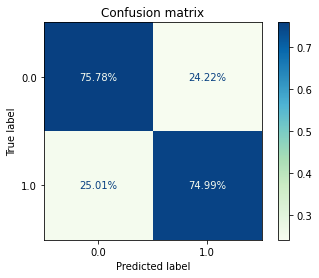

In [ ]:
metrics.plot_confusion_matrix(gnb, X_test, y_test, normalize = 'true', values_format = '.2%', cmap='GnBu')
plt.title('Confusion matrix');

## Cross Validation
There's a heavy bias towards predicting if they the target is not hit largely because of how there are more data points where that happens. 

It looks like there are a lot of false positives.

In [ ]:
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.  
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [ ]:
accuracy_scores = cross_validate(X, y, 100)
print(round(accuracy_scores.mean(), 5))

0.75561


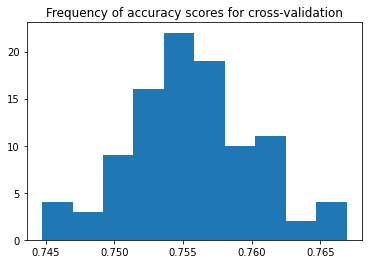

In [ ]:
plt.hist(accuracy_scores)
plt.title('Frequency of accuracy scores for cross-validation')
plt.show()

##Conclusion
While the data looks very noisey we were able to make an okay predictive model by balencing out the miss to hit ratio.  